In [1]:
import os
from os.path import join as opj
from omegaconf import OmegaConf
from importlib import import_module
import torch
from torch.utils.data import DataLoader
import cv2
import numpy as np
from cldm.plms_hacked import PLMSSampler
from cldm.model import create_model
from utils import tensor2img


/home/bolt17/miniconda3/envs/StableVITON/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Define the function that sets up arguments (used for CLI script in original code)
def build_args():
    # Replace command-line args with direct variable assignments
    args = {
        "config_path": './configs/VITONHD.yaml',
        "model_load_path": './ckpts/VITONHD.ckpt',
        "batch_size": 4,
        "data_root_dir": "./DATA",
        "repaint": False,
        "unpair": True,
        "save_dir": "inference",
        "denoise_steps": 50,
        "img_H": 512,
        "img_W": 384,
        "eta": 0.0
    }
    return args


In [3]:
# Load arguments
args = {
        "config_path": './configs/VITONHD.yaml',
        "model_load_path": './ckpts/VITONHD.ckpt',
        "batch_size": 4,
        "data_root_dir": "./DATA",
        "repaint": False,
        "unpair": True,
        "save_dir": "inference",
        "denoise_steps": 50,
        "img_H": 512,
        "img_W": 384,
        "eta": 0.0
    }

# Configuration setup
config = OmegaConf.load(args["config_path"])
config.model.params.img_H = args["img_H"]
config.model.params.img_W = args["img_W"]
params = config.model.params

# Load the model
model = create_model(config_path=None, config=config)
load_cp = torch.load(args["model_load_path"], map_location="cpu")
load_cp = load_cp["state_dict"] if "state_dict" in load_cp.keys() else load_cp
print('///////////////////////////////////// loading model')
model.load_state_dict(load_cp)
model = model.cuda()
model.eval()
print('/////////////////////////////////////model is loaded')
# Setup sampler
sampler = PLMSSampler(model)


module:
cldm.cldm
cls:
ControlLDM


/home/bolt17/miniconda3/envs/StableVITON/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/bolt17/miniconda3/envs/StableVITON/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Pl

ControlLDM: Running in eps-prediction mode
module:
cldm.warping_cldm_network
cls:
StableVITON
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryE

In [4]:
# GUESS SIZE CHART https://www.guess.com/us/en/size-charts.html#wdj
size_chart = {
    "XS": {"Bust": [33.5, 35], "Waist": [25, 26.5], "Hip": [37.5, 39]},
    "S": {"Bust": [35.5,37], "Waist": [27, 28.5], "Hip": [39.5, 42]},
    "M": {"Bust": [37.5, 39], "Waist": [29,30.5], "Hip": [42.5, 44]},
    "L": {"Bust": [39.5, 42], "Waist": [31, 33.5], "Hip": [44.5, 46.5]},
    "XL": {"Bust": [42.5, 44.5], "Waist": [34, 35.5], "Hip": [47]},
    "XXL": {"Bust": [45], "Waist": [36], "Hip": [47]},
}

In [5]:
# NIKE SIZE CHART https://www.nike.com/in/size-fit/womens-tops-alpha
size_chart = {
    "XXS": {"Bust": [27.5, 29.5], "Waist": [21.25, 23.5], "Hip": [30.5, 33]},
    "XS": {"Bust": [29.5, 32.5], "Waist": [23.5, 26], "Hip": [33, 35.5]},
    "S": {"Bust": [32.5, 35.5], "Waist": [26, 29], "Hip": [35.5, 38.5]},
    "M": {"Bust": [35.5, 38], "Waist": [29, 31.5], "Hip": [38.5, 41]},
    "L": {"Bust": [38, 41], "Waist": [31.5, 34.5], "Hip": [41, 44]},
    "XL": {"Bust": [41, 44.5], "Waist": [34.5, 38.5], "Hip": [44, 47]},
    "2XL": {"Bust": [44.5, 48.5], "Waist": [38.5, 42.5], "Hip": [47, 50]},
}

In [6]:
# GAP SIZE CHART https://www.gapfactory.com/customerService/info.do?cid=1037498#Wtops
size_chart = {
    "XXS": {"Bust": [30.25, 31.25], "Waist": [23.5, 24.5], "Hip": [33.25, 34.25]},
    "XS": {"Bust": [32.25, 33.25], "Waist": [25.5, 26.5], "Hip": [35.25, 36.25]},
    "S": {"Bust": [34.25, 35.25], "Waist": [27.5, 28.5], "Hip": [37.25, 38.25]},
    "M": {"Bust": [36.25, 37.25], "Waist": [29.5, 30.5], "Hip": [39.25, 40.25]},
    "L": {"Bust": [38.75, 40.25], "Waist": [32, 33.5], "Hip": [41.75, 43.25]},
    "XL": {"Bust": [42, 43.75], "Waist": [35.5, 37.5], "Hip": [45.25, 47.25]},
    "2XL": {"Bust": [45.75, 47.75], "Waist": [39.5, 41.5], "Hip": [49.25, 51.25]},
}

In [7]:
def get_standard_size(size, gender, unit):
    size_chart = {
        "men": {
            "S": {"Chest (inches)": list(range(34, 37)), "Chest (cm)": list(range(86, 92)), "Waist (inches)": list(range(28, 31)), "Waist (cm)": list(range(71, 77))},
            "M": {"Chest (inches)": list(range(38, 41)), "Chest (cm)": list(range(96, 102)), "Waist (inches)": list(range(32, 35)), "Waist (cm)": list(range(81, 87))},
            "L": {"Chest (inches)": list(range(42, 45)), "Chest (cm)": list(range(106, 113)), "Waist (inches)": list(range(36, 39)), "Waist (cm)": list(range(91, 97))},
            "XL": {"Chest (inches)": list(range(46, 49)), "Chest (cm)": list(range(116, 123)), "Waist (inches)": list(range(40, 43)), "Waist (cm)": list(range(101, 107))},
            "XXL": {"Chest (inches)": list(range(50, 53)), "Chest (cm)": list(range(127, 133)), "Waist (inches)": list(range(44, 47)), "Waist (cm)": list(range(112, 118))}
        },
        "women": {
            "XS": {"Bust (inches)": list(range(30, 33)), "Bust (cm)": list(range(76, 82)), "Waist (inches)": list(range(22, 25)), "Waist (cm)": list(range(56, 62))},
            "S": {"Bust (inches)": list(range(34, 37)), "Bust (cm)": list(range(86, 92)), "Waist (inches)": list(range(26, 29)), "Waist (cm)": list(range(66, 72))},
            "M": {"Bust (inches)": list(range(38, 41)), "Bust (cm)": list(range(96, 102)), "Waist (inches)": list(range(30, 33)), "Waist (cm)": list(range(76, 82))},
            "L": {"Bust (inches)": list(range(42, 45)), "Bust (cm)": list(range(106, 113)), "Waist (inches)": list(range(34, 37)), "Waist (cm)": list(range(86, 92))},
            "XL": {"Bust (inches)": list(range(46, 49)), "Bust (cm)": list(range(116, 123)), "Waist (inches)": list(range(38, 41)), "Waist (cm)": list(range(96, 102))}
        }
    }
    if unit == 'inch':
        if gender=="men":
            c='Chest (inches)'
            w='Waist (inches)'
        else:
            c='Bust (inches)'
            w='Waist (inches)'
        chest = size[c]
        waist = size[w]
    elif unit == 'cm':
        if gender=="men":
            c='Chest (inches)'
            w='Waist (inches)'
        else:
            c='Bust (inches)'
            w='Waist (inches)'
        chest = size[c]
        waist = size[w]
    else:
        print("Warning!, unit should be either cm/inch")
    
    chart = size_chart[gender]
    #print(chart)
    for cat, ranges in chart.items():
        #print(cat)
        #print(chest, ranges[c][-1])
        if chest <= ranges[c][-1]:
            #print(waist, ranges[w][-1], "-----------")
            if waist <= ranges[w][-1]:
                standard_size = cat
                break
            else:
                continue
        else:
            #print(waist, ranges[w][-1], "////////////")
            if waist <= ranges[w][-1]:
                standard_size = cat
                break
            else:
                continue
    
    return standard_size

In [6]:
men_size_inches = {"Chest (inches)": 39, "Waist (inches)": 30}
women_size_inches = {"Bust (inches)": 36, "Waist (inches)": 30}
print(get_standard_size(men_size_inches, 'men', 'inch'))
print(get_standard_size(women_size_inches, 'women', 'inch'))

S
M


In [7]:
size_comparison_men = {
    "S": {
        "H&M": "XS", 
        "Zara": "S", 
        "Nike/Adidas": "S", 
        "Uniqlo": "S", 
        "US/European Brands": "S", 
        "GAP": "S", 
        "Abercrombie & Fitch": "XS"
    },
    "M": {
        "H&M": "S", 
        "Zara": "M", 
        "Nike/Adidas": "M", 
        "Uniqlo": "M", 
        "US/European Brands": "M", 
        "GAP": "S", 
        "Abercrombie & Fitch": "S"
    },
    "L": {
        "H&M": "M", 
        "Zara": "L", 
        "Nike/Adidas": "L", 
        "Uniqlo": "L", 
        "US/European Brands": "L", 
        "GAP": "M", 
        "Abercrombie & Fitch": "M"
    },
    "XL": {
        "H&M": "L", 
        "Zara": "XL", 
        "Nike/Adidas": "XL", 
        "Uniqlo": "XL", 
        "US/European Brands": "XL", 
        "GAP": "L", 
        "Abercrombie & Fitch": "L"
    },
    "XXL": {
        "H&M": "XL", 
        "Zara": "XXL", 
        "Nike/Adidas": "XXL", 
        "Uniqlo": "XXL", 
        "US/European Brands": "XXL", 
        "GAP": "XL", 
        "Abercrombie & Fitch": "XL"
    },
}
size_comparison_women = {
    "XS": {
        "H&M": "XXS", 
        "Zara": "XS", 
        "Nike/Adidas": "XS", 
        "Uniqlo": "XS", 
        "US/European Brands": "XS", 
        "GAP": "XS", 
        "Abercrombie & Fitch": "XXS"
    },
    "S": {
        "H&M": "XS", 
        "Zara": "S", 
        "Nike/Adidas": "S", 
        "Uniqlo": "S", 
        "US/European Brands": "S", 
        "GAP": "S", 
        "Abercrombie & Fitch": "XS"
    },
    "M": {
        "H&M": "S", 
        "Zara": "M", 
        "Nike/Adidas": "M", 
        "Uniqlo": "M", 
        "US/European Brands": "M", 
        "GAP": "S", 
        "Abercrombie & Fitch": "S"
    },
    "L": {
        "H&M": "M", 
        "Zara": "L", 
        "Nike/Adidas": "L", 
        "Uniqlo": "L", 
        "US/European Brands": "L", 
        "GAP": "M", 
        "Abercrombie & Fitch": "M"
    },
    "XL": {
        "H&M": "L", 
        "Zara": "XL", 
        "Nike/Adidas": "XL", 
        "Uniqlo": "XL", 
        "US/European Brands": "XL", 
        "GAP": "L", 
        "Abercrombie & Fitch": "L"
    },
}

In [8]:
men_size_inches = {"Chest (inches)": 39, "Waist (inches)": 30}
women_size_inches = {"Bust (inches)": 35, "Waist (inches)": 28}
print(get_standard_size(men_size_inches, 'men', 'inch'))
print(get_standard_size(women_size_inches, 'women', 'inch'))

S
S


In [9]:
choices=['XS', 'S', 'M', 'L', 'XL', 'XXL']
selected_size='S'

In [4]:
import os
from os.path import join as opj

import cv2
import logging
import numpy as np
import albumentations as A
from torch.utils.data import Dataset

def modify_pose(image, degree):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    dark_blue = np.array([194, 80, 20])        # Dark blue in BGR
    green1 = np.array([116, 191, 145])         # Green shade 1 in BGR
    green2 = np.array([105, 190, 170])         # Green shade 2 in BGR
    is_color_present = np.any(np.all(image == dark_blue, axis=-1))
    
    mask_dark_blue = cv2.inRange(image, dark_blue, dark_blue)
    mask_green1 = cv2.inRange(image, green1, green1)
    mask_green2 = cv2.inRange(image, green2, green2)

    kernel_size = 15  # Adjust this size for the amount of dilation
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

    if degree==1:
        print(1)
        final_pose = image
    elif degree==2:
        print(2)
        dilated_mask_dark_blue = cv2.dilate(mask_dark_blue, kernel, iterations=2)
        dilated_mask_green1 = cv2.dilate(mask_green1, kernel, iterations=1)
        dilated_mask_green2 = cv2.dilate(mask_green2, kernel, iterations=1)

        # Combine the dilated green masks
        dilated_mask_green = cv2.bitwise_or(dilated_mask_green1, dilated_mask_green2)

        # Combine the dilated masks for both blue and green regions
        combined_dilated_mask = cv2.bitwise_or(dilated_mask_dark_blue, dilated_mask_green)
        output_image = image.copy()

        # Blue regions (priority) should be kept as blue
        output_image[dilated_mask_dark_blue > 0] = dark_blue

        # Green regions will be applied unless there's an overlap with blue (which we already set as blue)
        output_image[(dilated_mask_green > 0) & (dilated_mask_dark_blue == 0)] = green1  # Default green color (can adjust if needed)
        final_pose = output_image
    else:
        print(3)
        dilated_mask_dark_blue = cv2.dilate(mask_dark_blue, kernel, iterations=4)
        dilated_mask_green1 = cv2.dilate(mask_green1, kernel, iterations=2)
        dilated_mask_green2 = cv2.dilate(mask_green2, kernel, iterations=2)

        # Combine the dilated green masks
        dilated_mask_green = cv2.bitwise_or(dilated_mask_green1, dilated_mask_green2)

        # Combine the dilated masks for both blue and green regions
        combined_dilated_mask = cv2.bitwise_or(dilated_mask_dark_blue, dilated_mask_green)
        # cv2.imwrite('dilated_mask.jpg', combined_dilated_mask)
        output_image = image.copy()

        # Blue regions (priority) should be kept as blue
        output_image[dilated_mask_dark_blue > 0] = dark_blue

        # Green regions will be applied unless there's an overlap with blue (which we already set as blue)
        output_image[(dilated_mask_green > 0) & (dilated_mask_dark_blue == 0)] = green1  # Default green color (can adjust if needed)
        final_pose = output_image
    return final_pose

def imread(
        p, h, w, 
        is_mask=False, 
        in_inverse_mask=False, 
        img=None,
        densepose_degree=None
):
    if img is None:
        # print(p)
        img = cv2.imread(p)
        if densepose_degree!=None:
            img = modify_pose(img, densepose_degree)
            # cv2.imwrite('modified_pose.jpg', img)
    if not is_mask:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (w,h))
        img = (img.astype(np.float32) / 127.5) - 1.0  # [-1, 1]
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (w,h))
        img = (img >= 128).astype(np.float32)  # 0 or 1
        img = img[:,:,None]
        if in_inverse_mask:
            img = 1-img
    return img

def imread_for_albu(
        p, 
        is_mask=False, 
        in_inverse_mask=False, 
        cloth_mask_check=False, 
        use_resize=False, 
        height=512, 
        width=384,
        pose_degree = None
):
    # print(p)
    img = cv2.imread(p)
    if use_resize:
        img = cv2.resize(img, (width, height))
    if not is_mask:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # cv2.imwrite('before_pose.jpg', img)
        if pose_degree!=None:
            img = modify_pose(img, pose_degree)
            # cv2.imwrite('after_pose.jpg', img)
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = (img>=128).astype(np.float32)
        if cloth_mask_check:
            if img.sum() < 30720*4:
                img = np.ones_like(img).astype(np.float32)
        if in_inverse_mask:
            img = 1 - img
        img = np.uint8(img*255.0)
    return img
def norm_for_albu(img, is_mask=False):
    if not is_mask:
        img = (img.astype(np.float32)/127.5) - 1.0
    else:
        img = img.astype(np.float32) / 255.0
        img = img[:,:,None]
    return img

class VITONHDDataset(Dataset):
    def __init__(
            self, 
            data_root_dir, 
            img_H, 
            img_W, 
            is_paired=True, 
            is_test=False, 
            is_sorted=False, 
            transform_size=None, 
            transform_color=None,
            **kwargs
        ):
        self.drd = data_root_dir
        self.img_H = img_H
        self.img_W = img_W
        self.pair_key = "paired" if is_paired else "unpaired"
        self.data_type = "train" if not is_test else "test"
        self.is_test = is_test
        self.resize_ratio_H = 1.0
        self.resize_ratio_W = 1.0

        self.resize_transform = A.Resize(img_H, img_W)
        self.transform_size = None
        self.transform_crop_person = None
        self.transform_crop_cloth = None
        self.transform_color = None

        #### spatial aug >>>>
        transform_crop_person_lst = []
        transform_crop_cloth_lst = []
        transform_size_lst = [A.Resize(int(img_H*self.resize_ratio_H), int(img_W*self.resize_ratio_W))]
    
        if transform_size is not None:
            if "hflip" in transform_size:
                transform_size_lst.append(A.HorizontalFlip(p=0.5))

            if "shiftscale" in transform_size:
                transform_crop_person_lst.append(A.ShiftScaleRotate(rotate_limit=0, shift_limit=0.2, scale_limit=(-0.2, 0.2), border_mode=cv2.BORDER_CONSTANT, p=0.5, value=0))
                transform_crop_cloth_lst.append(A.ShiftScaleRotate(rotate_limit=0, shift_limit=0.2, scale_limit=(-0.2, 0.2), border_mode=cv2.BORDER_CONSTANT, p=0.5, value=0))

        self.transform_crop_person = A.Compose(
                transform_crop_person_lst,
                additional_targets={"agn":"image", 
                                    "agn_mask":"image", 
                                    "cloth_mask_warped":"image", 
                                    "cloth_warped":"image", 
                                    "image_densepose":"image", 
                                    "image_parse":"image", 
                                    "gt_cloth_warped_mask":"image", 
                                    }
        )
        self.transform_crop_cloth = A.Compose(
                transform_crop_cloth_lst,
                additional_targets={"cloth_mask":"image"}
        )

        self.transform_size = A.Compose(
                transform_size_lst,
                additional_targets={"agn":"image", 
                                    "agn_mask":"image", 
                                    "cloth":"image", 
                                    "cloth_mask":"image", 
                                    "cloth_mask_warped":"image", 
                                    "cloth_warped":"image", 
                                    "image_densepose":"image", 
                                    "image_parse":"image", 
                                    "gt_cloth_warped_mask":"image",
                                    }
            )
        #### spatial aug <<<<

        #### non-spatial aug >>>>
        if transform_color is not None:
            transform_color_lst = []
            for t in transform_color:
                if t == "hsv":
                    transform_color_lst.append(A.HueSaturationValue(5,5,5,p=0.5))
                elif t == "bright_contrast":
                    transform_color_lst.append(A.RandomBrightnessContrast(brightness_limit=(-0.1, 0.02), contrast_limit=(-0.3, 0.3), p=0.5))

            self.transform_color = A.Compose(
                transform_color_lst,
                additional_targets={"agn":"image", 
                                    "cloth":"image",  
                                    "cloth_warped":"image",
                                    }
            )
        #### non-spatial aug <<<<
                    
        assert not (self.data_type == "train" and self.pair_key == "unpaired"), f"train must use paired dataset"
        
        im_names = []
        c_names = []
        degree = []
        with open(opj(self.drd, f"{self.data_type}_pairs_custom.txt"), "r") as f:
            for line in f.readlines():
                parts = line.strip().split()
                im_name, c_name, extent = parts
                print(parts, flush=True)

                im_names.append(im_name)
                c_names.append(c_name)
                degree.append(int(extent))
        if is_sorted:
            im_names, c_names = zip(*sorted(zip(im_names, c_names)))
        self.im_names = im_names
        self.degree = degree
        self.c_names = dict()
        self.c_names["paired"] = im_names
        self.c_names["unpaired"] = c_names

    def __len__(self):
        return len(self.im_names)
    
    def __getitem__(self, idx):
        img_fn = self.im_names[idx]
        cloth_fn = self.c_names[self.pair_key][idx]
        if self.transform_size is None and self.transform_color is None:
            # print("ikkada")
            agn = imread(
                opj(self.drd, self.data_type, "agnostic-v3.2", self.im_names[idx]), 
                self.img_H, 
                self.img_W
            )
            agn_mask = imread(
                opj(self.drd, self.data_type, "agnostic-mask", self.im_names[idx].replace(".jpg", "_mask.png")), 
                self.img_H, 
                self.img_W, 
                is_mask=True, 
                in_inverse_mask=True
            )
            cloth = imread(
                opj(self.drd, self.data_type, "cloth", self.c_names[self.pair_key][idx]), 
                self.img_H, 
                self.img_W
            )
            cloth_mask = imread(
                opj(self.drd, self.data_type, "cloth-mask", self.c_names[self.pair_key][idx]), 
                self.img_H, 
                self.img_W, 
                is_mask=True, 
                cloth_mask_check=True
            )
            
            gt_cloth_warped_mask = imread(
                opj(self.drd, self.data_type, "gt_cloth_warped_mask", self.im_names[idx]), 
                self.img_H, 
                self.img_W, 
                is_mask=True
            ) if not self.is_test else np.zeros_like(agn_mask)

            image = imread(opj(self.drd, self.data_type, "image", self.im_names[idx]), self.img_H, self.img_W)
            image_densepose = imread(opj(self.drd, self.data_type, "image-densepose", self.im_names[idx]), self.img_H, self.img_W, densepose_degree=self.degree[idx])

        else:
            # print('akkada')
            agn = imread_for_albu(opj(self.drd, self.data_type, "agnostic-v3.2", self.im_names[idx]))
            agn_mask = imread_for_albu(opj(self.drd, self.data_type, "agnostic-mask", self.im_names[idx].replace(".jpg", "_mask.png")), is_mask=True)
            cloth = imread_for_albu(opj(self.drd, self.data_type, "cloth", self.c_names[self.pair_key][idx]))
            cloth_mask = imread_for_albu(opj(self.drd, self.data_type, "cloth-mask", self.c_names[self.pair_key][idx]), is_mask=True, cloth_mask_check=True)
            
            gt_cloth_warped_mask = imread_for_albu(
                opj(self.drd, self.data_type, "gt_cloth_warped_mask", self.im_names[idx]),
                is_mask=True
            ) if not self.is_test else np.zeros_like(agn_mask)
                
            image = imread_for_albu(opj(self.drd, self.data_type, "image", self.im_names[idx]))
            image_densepose = imread_for_albu(opj(self.drd, self.data_type, "image-densepose", self.im_names[idx]), pose_degree=self.degree[idx])

            if self.transform_size is not None:
                transformed = self.transform_size(
                    image=image, 
                    agn=agn, 
                    agn_mask=agn_mask, 
                    cloth=cloth, 
                    cloth_mask=cloth_mask, 
                    image_densepose=image_densepose,
                    gt_cloth_warped_mask=gt_cloth_warped_mask,
                )
                image=transformed["image"]
                agn=transformed["agn"]
                agn_mask=transformed["agn_mask"]
                image_densepose=transformed["image_densepose"]
                gt_cloth_warped_mask=transformed["gt_cloth_warped_mask"]

                cloth=transformed["cloth"]
                cloth_mask=transformed["cloth_mask"]
                
            if self.transform_crop_person is not None:
                transformed_image = self.transform_crop_person(
                    image=image,
                    agn=agn,
                    agn_mask=agn_mask,
                    image_densepose=image_densepose,
                    gt_cloth_warped_mask=gt_cloth_warped_mask,
                )

                image=transformed_image["image"]
                agn=transformed_image["agn"]
                agn_mask=transformed_image["agn_mask"]
                image_densepose=transformed_image["image_densepose"]
                gt_cloth_warped_mask=transformed["gt_cloth_warped_mask"]

            if self.transform_crop_cloth is not None:
                transformed_cloth = self.transform_crop_cloth(
                    image=cloth,
                    cloth_mask=cloth_mask
                )

                cloth=transformed_cloth["image"]
                cloth_mask=transformed_cloth["cloth_mask"]

            agn_mask = 255 - agn_mask
            if self.transform_color is not None:
                transformed = self.transform_color(
                    image=image, 
                    agn=agn, 
                    cloth=cloth,
                )

                image=transformed["image"]
                agn=transformed["agn"]
                cloth=transformed["cloth"]

                agn = agn * agn_mask[:,:,None].astype(np.float32)/255.0 + 128 * (1 - agn_mask[:,:,None].astype(np.float32)/255.0)
                
            agn = norm_for_albu(agn)
            agn_mask = norm_for_albu(agn_mask, is_mask=True)
            cloth = norm_for_albu(cloth)
            cloth_mask = norm_for_albu(cloth_mask, is_mask=True)
            image = norm_for_albu(image)
            image_densepose = norm_for_albu(image_densepose)
            gt_cloth_warped_mask = norm_for_albu(gt_cloth_warped_mask, is_mask=True)
            
        return dict(
            agn=agn,
            agn_mask=agn_mask,
            cloth=cloth,
            cloth_mask=cloth_mask,
            image=image,
            image_densepose=image_densepose,
            gt_cloth_warped_mask=gt_cloth_warped_mask,
            txt="",
            img_fn=img_fn,
            cloth_fn=cloth_fn,
        )

In [21]:
print('////////////////////////////loading dataset...')
# dataset = getattr(import_module("dataset"), config.dataset_name)(
#     data_root_dir=args["data_root_dir"],
#     img_H=args["img_H"],
#     img_W=args["img_W"],
#     is_paired=not args["unpair"],
#     is_test=True,
#     is_sorted=True
# )
dataset = VITONHDDataset(
    data_root_dir=args["data_root_dir"],
    img_H=args["img_H"],
    img_W=args["img_W"],
    is_paired=not args["unpair"],
    is_test=True,
    is_sorted=True
)
print('created dataset!')
# DataLoader setup
test_dataloader = DataLoader(dataset, num_workers=4, shuffle=False, batch_size=args["batch_size"], pin_memory=True)

////////////////////////////loading dataset...
['00071_00.jpg', 'test_generated_image_processed2.jpg', '1']
['00071_00.jpg', 'test_generated_image_processed2.jpg', '2']
['00071_00.jpg', 'test_generated_image_processed2.jpg', '3']
created dataset!


In [22]:
# Create save directory
save_dir='test3'
save_dir = opj(save_dir, "unpair" if args["unpair"] else "pair")
os.makedirs(save_dir, exist_ok=True)

# Inference loop
for batch_idx, batch in enumerate(test_dataloader):
    print(f"{batch_idx}/{len(test_dataloader)}")
    z, c = model.get_input(batch, params.first_stage_key)
    bs = z.shape[0]
    c_crossattn = c["c_crossattn"][0][:bs]
    if c_crossattn.ndim == 4:
        c_crossattn = model.get_learned_conditioning(c_crossattn)
        c["c_crossattn"] = [c_crossattn]
    uc_cross = model.get_unconditional_conditioning(bs)
    uc_full = {"c_concat": c["c_concat"], "c_crossattn": [uc_cross]}
    uc_full["first_stage_cond"] = c["first_stage_cond"]
    
    for k, v in batch.items():
        if isinstance(v, torch.Tensor):
            batch[k] = v.cuda()
    sampler.model.batch = batch

    ts = torch.full((1,), 999, device=z.device, dtype=torch.long)
    start_code = model.q_sample(z, ts)     
    
    samples, _, _ = sampler.sample(
        args["denoise_steps"],
        bs,
        (4, args["img_H"]//8, args["img_W"]//8), 
        c,
        x_T=start_code,
        verbose=False,
        eta=args["eta"],
        unconditional_conditioning=uc_full,
    )

    # Decode samples
    x_samples = model.decode_first_stage(samples)
    
    for sample_idx, (x_sample, fn, cloth_fn) in enumerate(zip(x_samples, batch['img_fn'], batch["cloth_fn"])):
        x_sample_img = tensor2img(x_sample)  # Convert tensor to image [0, 255]
        
        # Handle repaint if enabled
        if args["repaint"]:
            repaint_agn_img = np.uint8((batch["image"][sample_idx].cpu().numpy() + 1) / 2 * 255)
            repaint_agn_mask_img = batch["agn_mask"][sample_idx].cpu().numpy()
            x_sample_img = repaint_agn_img * repaint_agn_mask_img + x_sample_img * (1 - repaint_agn_mask_img)
            x_sample_img = np.uint8(x_sample_img)

        to_path = opj(save_dir, f"{fn.split('.')[0]}_{cloth_fn.split('.')[0]}_{sample_idx}.jpg")
        print(to_path)
        cv2.imwrite(to_path, x_sample_img[:, :, ::-1])


1
2
3
0/1
Data shape for PLMS sampling is (3, 4, 64, 48)
Running PLMS Sampling with 50 timesteps


PLMS Sampler: 100%|██████████| 50/50 [02:45<00:00,  3.32s/it]


test3/unpair/00071_00_test_generated_image_processed2_0.jpg
test3/unpair/00071_00_test_generated_image_processed2_1.jpg
test3/unpair/00071_00_test_generated_image_processed2_2.jpg


./test3/unpair/00071_00_test_generated_image_processed2.jpg_0
./test3/unpair/00071_00_test_generated_image_processed2.jpg_1
./test3/unpair/00071_00_test_generated_image_processed2.jpg_2


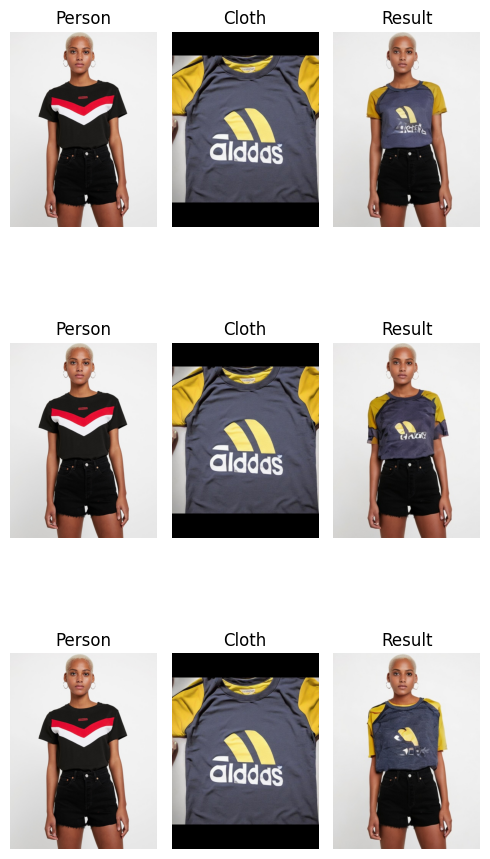

In [23]:
import matplotlib.pyplot as plt

# Example for displaying a batch of images
def display_images(images, titles=None):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for idx, ax in enumerate(axes):
        ax.imshow(images[idx])
        if titles:
            ax.set_title(titles[idx])
        ax.axis('off')
    plt.show()

test_data=open('./DATA/test_pairs_custom.txt', 'r')
items = test_data.readlines()
persons=[]
clothes=[]
final = []
for item in items:
    if item[-1]=='\n':
        text = item[:-1]
    else:
        text = item
    text = text.split(" ")
    person = text[0]
    cloth = text[1]
    persons.append(person)
    clothes.append(cloth)
    f = person[:-4]+"_"+cloth
    final.append(f)
# print(persons)
# print(clothes)
# print(final)

fig, axes = plt.subplots(len(persons),3, figsize=(5,10))
if len(persons) == 1:
    axes = [axes]

for i in range(len(persons)):
    for j in range(3):
        ax = axes[i][j]
        if j == 0:
            img = cv2.imread(f'./DATA/test/image/{persons[i]}')
        elif j == 1:
            img = cv2.imread(f'./DATA/test/cloth/{clothes[i]}')
        else:
            print(f'./{save_dir}/{final[i]}_{i}')
            img = cv2.imread(f'./{save_dir}/{final[i][:-4]}_{i}.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
        if j == 0:
            ax.set_title("Person")
        elif j == 1:
            ax.set_title("Cloth")
        else:
            ax.set_title("Result")

plt.tight_layout()
plt.show()

./test2/unpair/00055_00_test_generated_image_processed.jpg_0
./test2/unpair/00055_00_test_generated_image_processed.jpg_1
./test2/unpair/00055_00_test_generated_image_processed.jpg_2


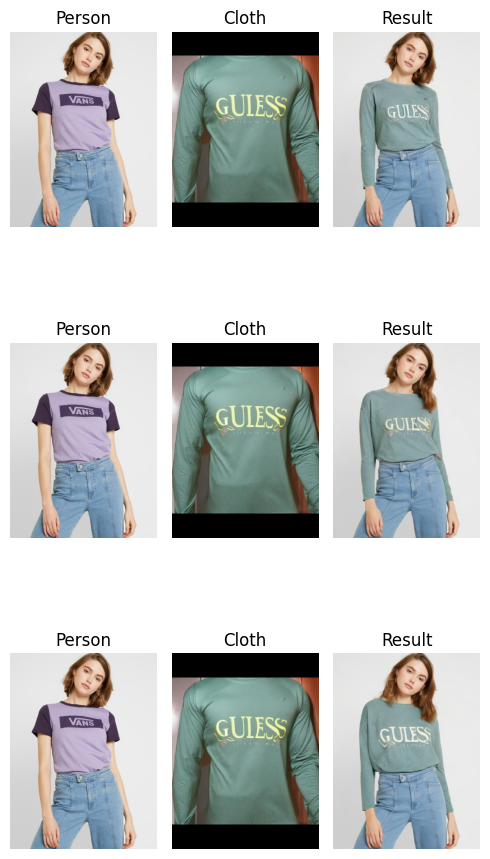

In [ ]:
import matplotlib.pyplot as plt

# Example for displaying a batch of images
def display_images(images, titles=None):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for idx, ax in enumerate(axes):
        ax.imshow(images[idx])
        if titles:
            ax.set_title(titles[idx])
        ax.axis('off')
    plt.show()

test_data=open('./DATA/test_pairs_custom.txt', 'r')
items = test_data.readlines()
persons=[]
clothes=[]
final = []
for item in items:
    if item[-1]=='\n':
        text = item[:-1]
    else:
        text = item
    text = text.split(" ")
    person = text[0]
    cloth = text[1]
    persons.append(person)
    clothes.append(cloth)
    f = person[:-4]+"_"+cloth
    final.append(f)
# print(persons)
# print(clothes)
# print(final)

fig, axes = plt.subplots(len(persons),3, figsize=(5,10))
if len(persons) == 1:
    axes = [axes]

for i in range(len(persons)):
    for j in range(3):
        ax = axes[i][j]
        if j == 0:
            img = cv2.imread(f'./DATA/test/image/{persons[i]}')
        elif j == 1:
            img = cv2.imread(f'./DATA/test/cloth/{clothes[i]}')
        else:
            print(f'./{save_dir}/{final[i]}_{i}')
            img = cv2.imread(f'./{save_dir}/{final[i][:-4]}_{i}.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
        if j == 0:
            ax.set_title("Person")
        elif j == 1:
            ax.set_title("Cloth")
        else:
            ax.set_title("Result")

plt.tight_layout()
plt.show()

./test3/unpair/00071_00_test_generated_image_processed1.jpg_0
./test3/unpair/00071_00_test_generated_image_processed1.jpg_1
./test3/unpair/00071_00_test_generated_image_processed1.jpg_2


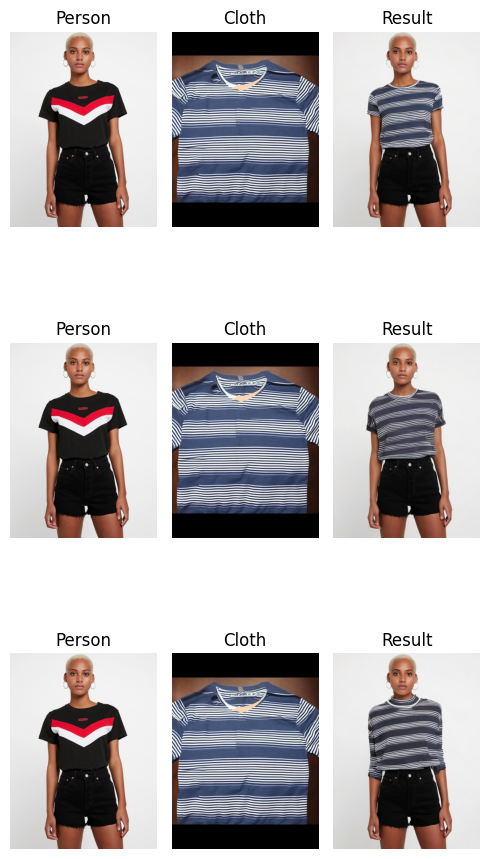

In [17]:
import matplotlib.pyplot as plt

# Example for displaying a batch of images
def display_images(images, titles=None):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for idx, ax in enumerate(axes):
        ax.imshow(images[idx])
        if titles:
            ax.set_title(titles[idx])
        ax.axis('off')
    plt.show()

test_data=open('./DATA/test_pairs_custom.txt', 'r')
items = test_data.readlines()
persons=[]
clothes=[]
final = []
for item in items:
    if item[-1]=='\n':
        text = item[:-1]
    else:
        text = item
    text = text.split(" ")
    person = text[0]
    cloth = text[1]
    persons.append(person)
    clothes.append(cloth)
    f = person[:-4]+"_"+cloth
    final.append(f)
# print(persons)
# print(clothes)
# print(final)

fig, axes = plt.subplots(len(persons),3, figsize=(5,10))
if len(persons) == 1:
    axes = [axes]

for i in range(len(persons)):
    for j in range(3):
        ax = axes[i][j]
        if j == 0:
            img = cv2.imread(f'./DATA/test/image/{persons[i]}')
        elif j == 1:
            img = cv2.imread(f'./DATA/test/cloth/{clothes[i]}')
        else:
            print(f'./{save_dir}/{final[i]}_{i}')
            img = cv2.imread(f'./{save_dir}/{final[i][:-4]}_{i}.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
        if j == 0:
            ax.set_title("Person")
        elif j == 1:
            ax.set_title("Cloth")
        else:
            ax.set_title("Result")

plt.tight_layout()
plt.show()